# Twitter

In [1]:
import json
from pprint import pprint
import pandas as pd
import tweepy
from textblob import TextBlob

In [2]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [4]:
#topic_study = '#AAPL'
topic_study = 'from:realDonaldTrump -filter:retweets'
tweet_list = []
cnt = 0
for tweet in tweepy.Cursor(api.search, q=topic_study, rpp=100).items():
    tweet_list.append(tweet)
    cnt = cnt + 1
    if cnt == 100:
        break

In [5]:
for oo in range(len(tweet_list))[:10]:
    pprint(tweet_list[oo]._json['text'])

'THANK YOU JAPAN!🇺🇸🇯🇵 https://t.co/ZvzEL8iQsi'
('Back from Japan after a very successful trip. Big progress on MANY fronts. A '
 'great country with a wonderful leader in Prime Minister Abe!')
('I was actually sticking up for Sleepy Joe Biden while on foreign soil. Kim '
 'Jong Un called him a “low IQ idiot,” and… https://t.co/mv6yeYqys9')
('Just spoke to Governor @AsaHutchinson of the Great State of Arkansas to '
 'inform him that FEMA and the Federal Govern… https://t.co/nKNR4Xp4Ck')
('.@GovMikeDeWine just updated me on the devastation from the many tornadoes '
 'that struck Ohio early this morning. My… https://t.co/mJTfaKXRwK')
('Storms overnight across Ohio and many other States were very dangerous and '
 'damaging. My team continues to update me… https://t.co/3liP95DNKi')
'GOD BLESS THE USA🇺🇸 https://t.co/Y8HRT6wnWZ'
('Spoke with @GovStitt of Oklahoma last night from Japan because of the '
 'devastating tornadoes. Told him that @FEMA an… https://t.co/9j8urG65m9')
'Can’t wait to se

In [6]:
json_str = json.dumps(tweet_list[1]._json)
pprint(json.loads(json_str))

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed May 29 00:22:51 +0000 2019',
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 58687,
 'favorited': False,
 'geo': None,
 'id': 1133529099530571777,
 'id_str': '1133529099530571777',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 12160,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'text': 'Back from Japan after a very successful trip. Big progress on MANY '
         'fronts. A great country with a wonderful leader in Prime Minister '
         'Abe!',
 'truncated': False,
 'user': {'contributors_enabled': False,
          'created_a

In [7]:
tweet_text = []
for i in range(0,len(tweet_list)):
    status = tweet_list[i]
    json_str = json.dumps(status._json)
    tweet_text.append(json.loads(json_str)['text'])

In [8]:
tweet_text_df = pd.DataFrame({'tweet_text' : tweet_text})
tweet_text_df.head()

,tweet_text
0,THANK YOU JAPAN!🇺🇸🇯🇵 https://t.co/ZvzEL8iQsi
1,Back from Japan after a very successful trip. ...
2,I was actually sticking up for Sleepy Joe Bide...
3,Just spoke to Governor @AsaHutchinson of the G...
4,.@GovMikeDeWine just updated me on the devasta...


In [9]:
tweet_text_df['language_detected'] = tweet_text_df['tweet_text'].apply(lambda x : \
                                                                       str(TextBlob('u'+str(x)).detect_language()))

In [10]:
tweet_text_df_eng = tweet_text_df[tweet_text_df['language_detected']=='en']
tweet_text_df_eng.shape

(94, 2)

# Sentiment

In [11]:
tweet_text_df_eng['sentiment_score'] = tweet_text_df_eng['tweet_text'].apply(lambda x: \
                                                                             str(TextBlob('u'+str(x)).sentiment.polarity))

/Users/anthonyn/anaconda3/envs/ml_with_python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
pd.set_option('display.max_colwidth', -1)
tweet_text_df_eng[['tweet_text', 'sentiment_score']].head(10)

,tweet_text,sentiment_score
1,Back from Japan after a very successful trip. Big progress on MANY fronts. A great country with a wonderful leader in Prime Minister Abe!,0.655
2,"I was actually sticking up for Sleepy Joe Biden while on foreign soil. Kim Jong Un called him a “low IQ idiot,” and… https://t.co/mv6yeYqys9",-0.23125
3,Just spoke to Governor @AsaHutchinson of the Great State of Arkansas to inform him that FEMA and the Federal Govern… https://t.co/nKNR4Xp4Ck,0.8
4,.@GovMikeDeWine just updated me on the devastation from the many tornadoes that struck Ohio early this morning. My… https://t.co/mJTfaKXRwK,0.3
5,Storms overnight across Ohio and many other States were very dangerous and damaging. My team continues to update me… https://t.co/3liP95DNKi,-0.135
7,Spoke with @GovStitt of Oklahoma last night from Japan because of the devastating tornadoes. Told him that @FEMA an… https://t.co/9j8urG65m9,-0.5
8,Can’t wait to see you all soon! https://t.co/KKAw4hqqx5,0.0
9,"I will be making two stops this morning in Japan to visit with our Great Military, then a quick stop in Alaska and… https://t.co/wlcyljEJe6",0.3444444444444445
10,"Anyone associated with the 1994 Crime Bill will not have a chance of being elected. In particular, African American… https://t.co/ysMwWeyOtA",0.08333333333333333
11,....Super Predator was the term associated with the 1994 Crime Bill that Sleepy Joe Biden was so heavily involved i… https://t.co/w6WQ5MTsoK,-0.2


# Word Cloud

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

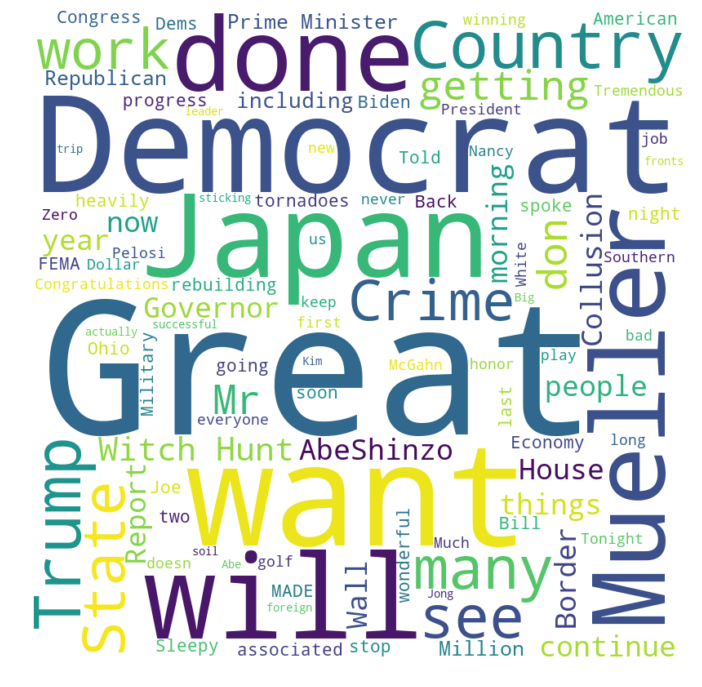

In [14]:
other_stopwords_to_remove = ['https', 'amp','co', 'rt']
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

plt.figure(figsize=(16,12))
text=tweet_text_df_eng["tweet_text"]
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=100,
                stopwords = stopwords, 
                min_font_size = 10).generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***

In [15]:
def get_sentiment(dataframe, column):
    text_column = dataframe[column]
    textblob_sentiment = text_column.apply(TextBlob)
    sentiment_values = [ {'Polarity': v.sentiment.polarity, 
                          'Subjectivity': v.sentiment.subjectivity}
                   for v in textblob_sentiment.values]
    return pd.DataFrame(sentiment_values)

In [16]:
sentiment_frame = get_sentiment(tweet_text_df_eng, 'tweet_text')

In [17]:
sentiment_frame.head(4)

,Polarity,Subjectivity
0,0.545833,0.558333
1,-0.231250,0.331250
2,0.800000,0.750000
3,0.300000,0.400000


In [18]:
tweets = pd.concat([tweet_text_df_eng, sentiment_frame], axis=1).dropna()
tweets.head(10)

,tweet_text,language_detected,sentiment_score,Polarity,Subjectivity
1,Back from Japan after a very successful trip. Big progress on MANY fronts. A great country with a wonderful leader in Prime Minister Abe!,en,0.655,-0.231250,0.331250
2,"I was actually sticking up for Sleepy Joe Biden while on foreign soil. Kim Jong Un called him a “low IQ idiot,” and… https://t.co/mv6yeYqys9",en,-0.23125,0.800000,0.750000
3,Just spoke to Governor @AsaHutchinson of the Great State of Arkansas to inform him that FEMA and the Federal Govern… https://t.co/nKNR4Xp4Ck,en,0.8,0.300000,0.400000
4,.@GovMikeDeWine just updated me on the devastation from the many tornadoes that struck Ohio early this morning. My… https://t.co/mJTfaKXRwK,en,0.3,-0.135000,0.625000
5,Storms overnight across Ohio and many other States were very dangerous and damaging. My team continues to update me… https://t.co/3liP95DNKi,en,-0.135,-0.500000,0.533333
7,Spoke with @GovStitt of Oklahoma last night from Japan because of the devastating tornadoes. Told him that @FEMA an… https://t.co/9j8urG65m9,en,-0.5,0.344444,0.450000
8,Can’t wait to see you all soon! https://t.co/KKAw4hqqx5,en,0.0,0.083333,0.166667
9,"I will be making two stops this morning in Japan to visit with our Great Military, then a quick stop in Alaska and… https://t.co/wlcyljEJe6",en,0.3444444444444445,-0.200000,0.500000
10,"Anyone associated with the 1994 Crime Bill will not have a chance of being elected. In particular, African American… https://t.co/ysMwWeyOtA",en,0.08333333333333333,0.000000,0.000000
11,....Super Predator was the term associated with the 1994 Crime Bill that Sleepy Joe Biden was so heavily involved i… https://t.co/w6WQ5MTsoK,en,-0.2,0.000000,0.000000


***